In [377]:
import pandas as pd
test = pd.read_csv('dataset/test.csv')
test.shape

(5000, 2)

In [435]:
train = pd.read_csv('dataset/train.csv')
train.head()

,id,document,label
0,1,영상이나 음악이 이쁘다 해도 미화시킨 불륜일뿐,0
1,2,히치콕이 이 영화를 봤다면 분명 박수를 쳤을듯...,1
2,3,괜찮은 음악영화가 또 나왔군요!!! 따뜻한 겨울이 될 것 같아요~,1
3,4,아무래도 20년도지난작품이라 지금보기는너무유치하다,0
4,5,지금까지의 영화들이 그랬듯. 이 영화역시 일본에 대한 미화는 여전하다.,0


In [26]:
train['document'].nunique(), train['label'].nunique() # 데이터의 정보 확인

(5000, 2)

<AxesSubplot:>

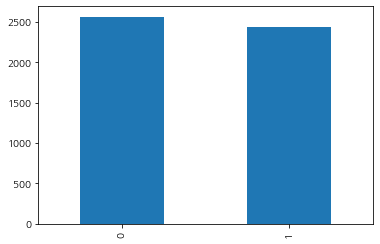

In [27]:
import matplotlib.pyplot as plt
train['label'].value_counts().plot(kind = 'bar') # 긍정과 부정리뷰의 개수 비교

In [12]:
train['label'].value_counts() # 구체적인 회수 비교

0    2564
1    2436
Name: label, dtype: int64

In [436]:
train['document'] = train['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 a-z A-Z]","") # 이모티콘, 마침표 등등을 제외하는 전처리
train.head()

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_11964/2712448841.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train['document'] = train['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 a-z A-Z]","")


,id,document,label
0,1,영상이나 음악이 이쁘다 해도 미화시킨 불륜일뿐,0
1,2,히치콕이 이 영화를 봤다면 분명 박수를 쳤을듯,1
2,3,괜찮은 음악영화가 또 나왔군요 따뜻한 겨울이 될 것 같아요,1
3,4,아무래도 년도지난작품이라 지금보기는너무유치하다,0
4,5,지금까지의 영화들이 그랬듯 이 영화역시 일본에 대한 미화는 여전하다,0


In [437]:
train['document'] = train['document'].str.replace('^ +', "") # 빈칸인 데이터를 empty value로 변경
train['document'].replace('', np.nan, inplace=True)
print(train.isnull().sum())

id          0
document    0
label       0
dtype: int64


C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_11964/2736232508.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train['document'] = train['document'].str.replace('^ +', "") # white space 데이터를 empty value로 변경


In [378]:
test['document'] = test['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 a-z A-Z]","")
test['document'] = test['document'].str.replace('^ +', "")
test['document'].replace('', np.nan, inplace=True)
print(test.isnull().sum())

id          0
document    0
dtype: int64


C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_11964/4214626495.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  test['document'] = test['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 a-z A-Z]","")
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_11964/4214626495.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test['document'] = test['document'].str.replace('^ +', "")


In [355]:
from konlpy.tag import Okt
okt = Okt()

In [476]:
import json
import os
from pprint import pprint

def tokenize(doc) :
    return ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)]

In [483]:
# 단어를 토큰화하는건 시간이 오래 걸리므로 한번만 만들고 따로 저장함
if os.path.isfile('train_docs.json') :
    with open('train_docs.json', encoding='utf-8') as f :
        train_docs = json.load(f)
    with open('test_docs.json', encoding='utf-8') as f :
        test_docs = json.load(f)
        
else :
    train_docs = [(tokenize(row[1]), row[2]) for row in train.values]
    test_docs = [(tokenize(row[1])) for row in test.values]
    
    with open('train_docs.json', 'w', encoding="utf-8") as make_file:
        json.dump(train_docs, make_file, ensure_ascii=False, indent="\t")
    with open('test_docs.json', 'w', encoding="utf-8") as make_file:
        json.dump(test_docs, make_file, ensure_ascii=False, indent="\t")
        
pprint(train_docs[0])

(['영상/Noun',
  '이나/Josa',
  '음악/Noun',
  '이/Josa',
  '이쁘다/Adjective',
  '해도/Noun',
  '미화/Noun',
  '시키다/Verb',
  '불륜/Noun',
  '일/Modifier',
  '뿐/Noun'],
 0)


In [484]:
for word in train_docs[:2] :
    print(word)

(['영상/Noun', '이나/Josa', '음악/Noun', '이/Josa', '이쁘다/Adjective', '해도/Noun', '미화/Noun', '시키다/Verb', '불륜/Noun', '일/Modifier', '뿐/Noun'], 0)
(['히치콕/Noun', '이/Josa', '이/Noun', '영화/Noun', '를/Josa', '보다/Verb', '분명/Noun', '박수/Noun', '를/Josa', '치다/Verb'], 1)


In [490]:
tokens = [t for d in train_docs for t in d[0] if t.split('/')[1] != 'Josa']
print(len(tokens)) # 조사를 제외한 토큰의 총 개수

40183


In [489]:
import nltk
text = nltk.Text(tokens, name = 'NMSC')
pprint(text.vocab().most_common(10)) # 가장 많이 등장한 단어

[('영화/Noun', 1531),
 ('보다/Verb', 1106),
 ('하다/Verb', 891),
 ('없다/Adjective', 460),
 ('너무/Adverb', 385),
 ('재밌다/Adjective', 355),
 ('들/Suffix', 353),
 ('좋다/Adjective', 349),
 ('정말/Noun', 320),
 ('이/Determiner', 305)]


In [519]:
selected_words = [f[0] for f in text.vocab().most_common(25000)]
# 자주 나오는 단어로 데이터 구성
def term_frequancy(doc) :
    return [doc.count(word) for word in selected_words]

X_train = [term_frequancy(d) for d, _ in train_docs]
X_test = [term_frequancy(d) for d in test_docs]
y_train = [c for _, c in train_docs]

In [520]:
import numpy as np

X_train = np.asarray(X_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_train = np.asarray(y_train).astype('float32')

In [544]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

model = models.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer= optimizers.RMSprop(lr = 0.001),
             loss = losses.binary_crossentropy,
             metrics = [metrics.binary_accuracy])

model.fit(X_train, y_train, epochs = 5, batch_size = 100)
results = model.evaluate(X_train, y_train)

C:\Users\Administrator\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/5
50/50 [==============================] - 1s 11ms/step - loss: 0.5378 - binary_accuracy: 0.7846
Epoch 2/5
50/50 [==============================] - 1s 11ms/step - loss: 0.2489 - binary_accuracy: 0.9142
Epoch 3/5
50/50 [==============================] - 1s 10ms/step - loss: 0.1467 - binary_accuracy: 0.9506
Epoch 4/5
50/50 [==============================] - 1s 11ms/step - loss: 0.0930 - binary_accuracy: 0.9696
Epoch 5/5
157/157 [==============================] - 1s 2ms/step - loss: 0.0346 - binary_accuracy: 0.9898


In [545]:
predict = model.predict(X_test)

In [546]:
prediction = [1 if float(score) > 0.5 else 0 for score in predict] # 1-긍정, 0-부정

In [547]:
test['label'] = prediction